In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# MLOps
import dvc.api
import mlflow

plt.style.use('fivethirtyeight')
%matplotlib inline

<span style="color:gold">See #9 issue.</span>

## Loading Data


### Setup DVC experiment and configs

In [2]:
# main path
SRC_DIR = '/mnt/e/dataset/processed/all/'  # path to source encrypted pdf
DST_DIR = 'raw-dataset/all/'  # path to decrypted pdf

# MLFlow configs
# data versioning config
PATH = DST_DIR[:-1] + '.pkl'  # path to source data, e.g. data.pkl file
REPO = '/home/nik/visaland-visa-form-utility'
VERSION = 'v1.0.0'  # use latest using `git tag`

# experiment configs
MLFLOW_EXPERIMENT_NAME = 'data exploration - jupyter lab'
mlflow.set_experiment(MLFLOW_EXPERIMENT_NAME)
MLFLOW_TAGS = {
    'stage': 'dev'  # dev, beta, production
}
mlflow.set_tags(MLFLOW_TAGS)


### Set global options for the notebook

In [3]:
# pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# matplotlib
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# seaborn
# color_palette = sns.color_palette("husl", 9)
# sns.set_palette(color_palette)

### Import data from DVC storage

In [4]:
# get url data from DVC data storage
data_url = dvc.api.get_url(path=PATH, repo=REPO, rev=VERSION)
# read dataset from remote (local) data storage
data = pd.read_pickle(data_url)

### Getting to know the data

In [5]:
data.head()

,P1.AdultFlag,P1.PD.ServiceIn.ServiceIn,P1.PD.VisaType.VisaType,P1.PD.AliasName.AliasNameIndicator.AliasNameIndicator,P1.PD.Sex.Sex,P1.PD.PlaceBirthCity,P1.PD.PlaceBirthCountry,P1.PD.Citizenship.Citizenship,P1.PD.CurrCOR.Row2.Country,P1.PD.CurrCOR.Row2.Status,P1.PD.CurrCOR.Row2.Other,P1.PD.PCRIndicator,P1.PD.PrevCOR.Row2.Country,P1.PD.PrevCOR.Row2.Status,P1.PD.PrevCOR.Row3.Country,P1.PD.PrevCOR.Row3.Status,P1.PD.SameAsCORIndicator,P1.PD.CWA.Row2.Country,P1.PD.CWA.Row2.Status,P1.PD.CWA.Row2.Other,P1.MS.SecA.MS,P2.MS.SecA.PrevMarrIndicator,P2.MS.SecA.TypeOfRelationship,P2.MS.SecA.Psprt.CountryofIssue.CountryofIssue,P2.MS.SecA.Langs.languages.nativeLang.nativeLang,P2.MS.SecA.Langs.languages.ableToCommunicate.ableToCommunicate,P2.MS.SecA.Langs.LangTest,P2.natID.q1.natIDIndicator,P2.natID.natIDdocs.CountryofIssue.CountryofIssue,P2.USCard.q1.usCardIndicator,P2.CI.cntct.PhnNums.Phn.CanadaUS,P2.CI.cntct.PhnNums.AltPhn.CanadaUS,P3.DOV.PrpsRow1.PrpsOfVisit.PrpsOfVisit,P3.DOV.PrpsRow1.Other.Other,P3.DOV.PrpsRow1.Funds.Funds,P3.DOV.cntcts_Row1.RelationshipToMe.RelationshipToMe,P3.cntcts_Row2.Relationship.RelationshipToMe,P3.Edu.EduIndicator,P3.Edu.Edu_Row1.Country.Country,P3.Occ.OccRow1.Occ.Occ,P3.Occ.OccRow1.Country.Country,P3.Occ.OccRow2.Occ.Occ,P3.Occ.OccRow2.Country.Country,P3.Occ.OccRow3.Occ.Occ,P3.Occ.OccRow3.Country.Country,P3.BGI.Details.MedicalDetails,P3.BGI.otherThanMedic,P3.noAuthStay,P3.refuseDeport,P3.BGI2.PrevApply,P3.PWrapper.criminalRec,P3.PWrapper.Military.Choice,P3.PWrapper.politicViol,P3.PWrapper.witnessIllTreat,P1.PD.CurrCOR.Row2.Period,P1.PD.DOBYear.Period,P1.PD.PrevCOR.Row2.Period,P1.PD.PrevCOR.Row3.Period,P1.PD.CWA.Row2.Period,P1.MS.SecA.DateOfMarr.Period,P2.MS.SecA.PrevSpouseDOB.DOBYear.Period,P2.MS.SecA.Period,P2.MS.SecA.Psprt.ExpiryDate.Remaining,P3.DOV.PrpsRow1.HLS.Period,P3.Edu.Edu_Row1.Period,P3.Occ.OccRow1.Period,P3.Occ.OccRow2.Period,P3.Occ.OccRow3.Period,p1.Subform1.Visitor,p1.Subform1.Worker,p1.Subform1.Student,p1.Subform1.Other,p1.SecA.App.ChdMStatus,p1.SecA.Sps.SpsCOB,p1.SecA.Sps.SpsOcc,p1.SecA.Sps.SpsAccomp,p1.SecA.Mo.MoCOB,p1.SecA.Mo.MoOcc,p1.SecA.Mo.MoAccomp,p1.SecA.Mo.ChdMStatus,p1.SecA.Fa.FaCOB,p1.SecA.Fa.FaOcc,p1.SecA.Fa.FaAccomp,p1.SecA.Fa.ChdMStatus,p1.SecB.Chd.[0].ChdMStatus,p1.SecB.Chd.[0].ChdRel,p1.SecB.Chd.[0].ChdCOB,p1.SecB.Chd.[0].ChdOcc,p1.SecB.Chd.[0].ChdAccomp,p1.SecB.Chd.[1].ChdMStatus,p1.SecB.Chd.[1].ChdRel,p1.SecB.Chd.[1].ChdCOB,p1.SecB.Chd.[1].ChdOcc,p1.SecB.Chd.[1].ChdAccomp,p1.SecB.Chd.[2].ChdMStatus,p1.SecB.Chd.[2].ChdRel,p1.SecB.Chd.[2].ChdCOB,p1.SecB.Chd.[2].ChdOcc,p1.SecB.Chd.[2].ChdAccomp,p1.SecB.Chd.[3].ChdMStatus,p1.SecB.Chd.[3].ChdRel,p1.SecB.Chd.[3].ChdCOB,p1.SecB.Chd.[3].ChdOcc,p1.SecB.Chd.[3].ChdAccomp,p1.SecC.Chd.[0].ChdMStatus,p1.SecC.Chd.[0].ChdRel,p1.SecC.Chd.[0].ChdCOB,p1.SecC.Chd.[0].ChdOcc,p1.SecC.Chd.[0].ChdAccomp,p1.SecC.Chd.[1].ChdMStatus,p1.SecC.Chd.[1].ChdRel,p1.SecC.Chd.[1].ChdCOB,p1.SecC.Chd.[1].ChdOcc,p1.SecC.Chd.[1].ChdAccomp,p1.SecC.Chd.[2].ChdMStatus,p1.SecC.Chd.[2].ChdRel,p1.SecC.Chd.[2].ChdCOB,p1.SecC.Chd.[2].ChdOcc,p1.SecC.Chd.[2].ChdAccomp,p1.SecC.Chd.[3].ChdMStatus,p1.SecC.Chd.[3].ChdRel,p1.SecC.Chd.[3].ChdCOB,p1.SecC.Chd.[3].ChdOcc,p1.SecC.Chd.[3].ChdAccomp,p1.SecC.Chd.[4].ChdMStatus,p1.SecC.Chd.[4].ChdRel,p1.SecC.Chd.[4].ChdCOB,p1.SecC.Chd.[4].ChdOcc,p1.SecC.Chd.[4].ChdAccomp,p1.SecC.Chd.[5].ChdMStatus,p1.SecC.Chd.[5].ChdRel,p1.SecC.Chd.[5].ChdCOB,p1.SecC.Chd.[5].ChdOcc,p1.SecC.Chd.[5].ChdAccomp,p1.SecC.Chd.[6].ChdMStatus,p1.SecC.Chd.[6].ChdRel,p1.SecC.Chd.[6].ChdCOB,p1.SecC.Chd.[6].ChdOcc,p1.SecC.Chd.[6].ChdAccomp,p1.SecA.Sps.SpsDOB.Period,p1.SecA.Mo.MoDOB.Period,p1.SecA.Fa.FaDOB.Period,p1.SecB.Chd.[0].ChdDOB.Period,p1.SecB.Chd.[1].ChdDOB.Period,p1.SecB.Chd.[2].ChdDOB.Period,p1.SecB.Chd.[3].ChdDOB.Period,p1.SecC.Chd.[0].ChdDOB.Period,p1.SecC.Chd.[1].ChdDOB.Period,p1.SecC.Chd.[2].ChdDOB.Period,p1.SecC.Chd.[3].ChdDOB.Period,p1.SecC.Chd.[4].ChdDOB.Period,p1.SecC.Chd.[5].ChdDOB.Period,p1.SecC.Chd.[6].ChdDOB.Period,VisaResult
0,True,1.0,VisitorVisa,F

In [6]:
# remove duplicates
data.drop_duplicates(inplace=True)

In [7]:
data.isnull().sum()[data.isnull().sum() != 0] #checking for total null values

P1.AdultFlag                                              3
P1.PD.ServiceIn.ServiceIn                                 3
P1.PD.VisaType.VisaType                                   3
P1.PD.AliasName.AliasNameIndicator.AliasNameIndicator     3
P1.PD.Sex.Sex                                             3
                                                         ..
p1.SecC.Chd.[2].ChdDOB.Period                            26
p1.SecC.Chd.[3].ChdDOB.Period                            26
p1.SecC.Chd.[4].ChdDOB.Period                            26
p1.SecC.Chd.[5].ChdDOB.Period                            26
p1.SecC.Chd.[6].ChdDOB.Period                            26
Length: 153, dtype: int64

it seems we have 4 rows with no information (empty forms) but the flag exists. There is nothing we can do except deleting them.

In [8]:
data[data['P1.PD.VisaType.VisaType'].isna()]

,P1.AdultFlag,P1.PD.ServiceIn.ServiceIn,P1.PD.VisaType.VisaType,P1.PD.AliasName.AliasNameIndicator.AliasNameIndicator,P1.PD.Sex.Sex,P1.PD.PlaceBirthCity,P1.PD.PlaceBirthCountry,P1.PD.Citizenship.Citizenship,P1.PD.CurrCOR.Row2.Country,P1.PD.CurrCOR.Row2.Status,P1.PD.CurrCOR.Row2.Other,P1.PD.PCRIndicator,P1.PD.PrevCOR.Row2.Country,P1.PD.PrevCOR.Row2.Status,P1.PD.PrevCOR.Row3.Country,P1.PD.PrevCOR.Row3.Status,P1.PD.SameAsCORIndicator,P1.PD.CWA.Row2.Country,P1.PD.CWA.Row2.Status,P1.PD.CWA.Row2.Other,P1.MS.SecA.MS,P2.MS.SecA.PrevMarrIndicator,P2.MS.SecA.TypeOfRelationship,P2.MS.SecA.Psprt.CountryofIssue.CountryofIssue,P2.MS.SecA.Langs.languages.nativeLang.nativeLang,P2.MS.SecA.Langs.languages.ableToCommunicate.ableToCommunicate,P2.MS.SecA.Langs.LangTest,P2.natID.q1.natIDIndicator,P2.natID.natIDdocs.CountryofIssue.CountryofIssue,P2.USCard.q1.usCardIndicator,P2.CI.cntct.PhnNums.Phn.CanadaUS,P2.CI.cntct.PhnNums.AltPhn.CanadaUS,P3.DOV.PrpsRow1.PrpsOfVisit.PrpsOfVisit,P3.DOV.PrpsRow1.Other.Other,P3.DOV.PrpsRow1.Funds.Funds,P3.DOV.cntcts_Row1.RelationshipToMe.RelationshipToMe,P3.cntcts_Row2.Relationship.RelationshipToMe,P3.Edu.EduIndicator,P3.Edu.Edu_Row1.Country.Country,P3.Occ.OccRow1.Occ.Occ,P3.Occ.OccRow1.Country.Country,P3.Occ.OccRow2.Occ.Occ,P3.Occ.OccRow2.Country.Country,P3.Occ.OccRow3.Occ.Occ,P3.Occ.OccRow3.Country.Country,P3.BGI.Details.MedicalDetails,P3.BGI.otherThanMedic,P3.noAuthStay,P3.refuseDeport,P3.BGI2.PrevApply,P3.PWrapper.criminalRec,P3.PWrapper.Military.Choice,P3.PWrapper.politicViol,P3.PWrapper.witnessIllTreat,P1.PD.CurrCOR.Row2.Period,P1.PD.DOBYear.Period,P1.PD.PrevCOR.Row2.Period,P1.PD.PrevCOR.Row3.Period,P1.PD.CWA.Row2.Period,P1.MS.SecA.DateOfMarr.Period,P2.MS.SecA.PrevSpouseDOB.DOBYear.Period,P2.MS.SecA.Period,P2.MS.SecA.Psprt.ExpiryDate.Remaining,P3.DOV.PrpsRow1.HLS.Period,P3.Edu.Edu_Row1.Period,P3.Occ.OccRow1.Period,P3.Occ.OccRow2.Period,P3.Occ.OccRow3.Period,p1.Subform1.Visitor,p1.Subform1.Worker,p1.Subform1.Student,p1.Subform1.Other,p1.SecA.App.ChdMStatus,p1.SecA.Sps.SpsCOB,p1.SecA.Sps.SpsOcc,p1.SecA.Sps.SpsAccomp,p1.SecA.Mo.MoCOB,p1.SecA.Mo.MoOcc,p1.SecA.Mo.MoAccomp,p1.SecA.Mo.ChdMStatus,p1.SecA.Fa.FaCOB,p1.SecA.Fa.FaOcc,p1.SecA.Fa.FaAccomp,p1.SecA.Fa.ChdMStatus,p1.SecB.Chd.[0].ChdMStatus,p1.SecB.Chd.[0].ChdRel,p1.SecB.Chd.[0].ChdCOB,p1.SecB.Chd.[0].ChdOcc,p1.SecB.Chd.[0].ChdAccomp,p1.SecB.Chd.[1].ChdMStatus,p1.SecB.Chd.[1].ChdRel,p1.SecB.Chd.[1].ChdCOB,p1.SecB.Chd.[1].ChdOcc,p1.SecB.Chd.[1].ChdAccomp,p1.SecB.Chd.[2].ChdMStatus,p1.SecB.Chd.[2].ChdRel,p1.SecB.Chd.[2].ChdCOB,p1.SecB.Chd.[2].ChdOcc,p1.SecB.Chd.[2].ChdAccomp,p1.SecB.Chd.[3].ChdMStatus,p1.SecB.Chd.[3].ChdRel,p1.SecB.Chd.[3].ChdCOB,p1.SecB.Chd.[3].ChdOcc,p1.SecB.Chd.[3].ChdAccomp,p1.SecC.Chd.[0].ChdMStatus,p1.SecC.Chd.[0].ChdRel,p1.SecC.Chd.[0].ChdCOB,p1.SecC.Chd.[0].ChdOcc,p1.SecC.Chd.[0].ChdAccomp,p1.SecC.Chd.[1].ChdMStatus,p1.SecC.Chd.[1].ChdRel,p1.SecC.Chd.[1].ChdCOB,p1.SecC.Chd.[1].ChdOcc,p1.SecC.Chd.[1].ChdAccomp,p1.SecC.Chd.[2].ChdMStatus,p1.SecC.Chd.[2].ChdRel,p1.SecC.Chd.[2].ChdCOB,p1.SecC.Chd.[2].ChdOcc,p1.SecC.Chd.[2].ChdAccomp,p1.SecC.Chd.[3].ChdMStatus,p1.SecC.Chd.[3].ChdRel,p1.SecC.Chd.[3].ChdCOB,p1.SecC.Chd.[3].ChdOcc,p1.SecC.Chd.[3].ChdAccomp,p1.SecC.Chd.[4].ChdMStatus,p1.SecC.Chd.[4].ChdRel,p1.SecC.Chd.[4].ChdCOB,p1.SecC.Chd.[4].ChdOcc,p1.SecC.Chd.[4].ChdAccomp,p1.SecC.Chd.[5].ChdMStatus,p1.SecC.Chd.[5].ChdRel,p1.SecC.Chd.[5].ChdCOB,p1.SecC.Chd.[5].ChdOcc,p1.SecC.Chd.[5].ChdAccomp,p1.SecC.Chd.[6].ChdMStatus,p1.SecC.Chd.[6].ChdRel,p1.SecC.Chd.[6].ChdCOB,p1.SecC.Chd.[6].ChdOcc,p1.SecC.Chd.[6].ChdAccomp,p1.SecA.Sps.SpsDOB.Period,p1.SecA.Mo.MoDOB.Period,p1.SecA.Fa.FaDOB.Period,p1.SecB.Chd.[0].ChdDOB.Period,p1.SecB.Chd.[1].ChdDOB.Period,p1.SecB.Chd.[2].ChdDOB.Period,p1.SecB.Chd.[3].ChdDOB.Period,p1.SecC.Chd.[0].ChdDOB.Period,p1.SecC.Chd.[1].ChdDOB.Period,p1.SecC.Chd.[2].ChdDOB.Period,p1.SecC.Chd.[3].ChdDOB.Period,p1.SecC.Chd.[4].ChdDOB.Period,p1.SecC.Chd.[5].ChdDOB.Period,p1.SecC.Chd.[6].ChdDOB.Period,VisaResult
10,NaN,NaN,NaN,NaN,NaN,N

In [9]:
data = data.drop(data[data['P1.PD.VisaType.VisaType'].isna()].index)
data.isnull().sum()[data.isnull().sum() != 0]

p1.SecA.Sps.SpsCOB                70
p1.SecA.Mo.MoCOB                   8
p1.SecA.Fa.FaCOB                   8
p1.SecB.Chd.[0].ChdDOB.Period    111
p1.SecB.Chd.[1].ChdDOB.Period    111
p1.SecB.Chd.[2].ChdDOB.Period    111
p1.SecB.Chd.[3].ChdDOB.Period    111
p1.SecC.Chd.[0].ChdDOB.Period     23
p1.SecC.Chd.[1].ChdDOB.Period     23
p1.SecC.Chd.[2].ChdDOB.Period     23
p1.SecC.Chd.[3].ChdDOB.Period     23
p1.SecC.Chd.[4].ChdDOB.Period     23
p1.SecC.Chd.[5].ChdDOB.Period     23
p1.SecC.Chd.[6].ChdDOB.Period     23
dtype: int64

We can see the only two type of data are missing:
1. COB: country of birth
2. Period: age of sibling and kids (probably because the person does not have any kid or sibling to fill)

| Feature | Fill | Desc |
| --- | --- | --- |
| COB | str: same as applicant's COB for ghost spouse | If all SpsCOB are the same, just drop the entire column, so no differentiation between ghost spouse or missed one.  
| Period | int: 0 | prob only ghost cases, otherwise, should be filled statistically 

In [10]:
spouse_fields = [c for c in data.columns.values if 'Sps' in c]
spouse_fields

['p1.SecA.Sps.SpsCOB',
 'p1.SecA.Sps.SpsOcc',
 'p1.SecA.Sps.SpsAccomp',
 'p1.SecA.Sps.SpsDOB.Period']

In [11]:
data[data['p1.SecA.Sps.SpsCOB'].isna()][spouse_fields]

,p1.SecA.Sps.SpsCOB,p1.SecA.Sps.SpsOcc,p1.SecA.Sps.SpsAccomp,p1.SecA.Sps.SpsDOB.Period
8,None,OTHER,False,0.0
15,None,OTHER,False,0.0
25,None,OTHER,False,0.0
27,None,HOUSEWIFE,True,10368.0
29,None,HOUSEWIFE,True,10368.0
...,...,...,...,...
288,None,OTHER,False,0.0
290,None,OTHER,False,0.0
291,None,OTHER,False,0.0
294,None,OTHER,False,0.0


In [12]:
print(data[data['p1.SecA.Sps.SpsCOB'].isna()][spouse_fields].__len__())
print(data[(data['p1.SecA.Sps.SpsOcc'] == 'OTHER') & (data['p1.SecA.Sps.SpsCOB'].isna())][spouse_fields].__len__())

70
67


There are 70-67 cases where the person has job title but no COB, which means that only 3 cases are not ghost cases and we can fill their COB using their spouse's COB.
For all other cases (ghosts), we just use the dominant case, IRAN. 

In [13]:
# fill ghost cases' COB with 'IRAN'
data.loc[(data['p1.SecA.Sps.SpsOcc'] == 'OTHER') & (data['p1.SecA.Sps.SpsCOB'].isna()), ['p1.SecA.Sps.SpsCOB']] = 'IRAN'

In [14]:
print(data[data['p1.SecA.Sps.SpsCOB'].isna()][spouse_fields].__len__())
print(data[(data['p1.SecA.Sps.SpsOcc'] == 'OTHER') & (data['p1.SecA.Sps.SpsCOB'].isna())][spouse_fields].__len__())

3
0


In [15]:
# fill non-filled spouse COB cases' with their spouses' COB
data.loc[data['p1.SecA.Sps.SpsCOB'].isna(), ['p1.SecA.Sps.SpsCOB']] = data['P1.PD.PlaceBirthCountry']

In [16]:
print(data[data['p1.SecA.Sps.SpsCOB'].isna()][spouse_fields].__len__())
print(data[(data['p1.SecA.Sps.SpsOcc'] == 'OTHER') & (data['p1.SecA.Sps.SpsCOB'].isna())][spouse_fields].__len__())

0
0


## Analyzing the features

### Ground truth

In [17]:
data.loc[data['VisaResult'] == 1, ['VisaResult']] = 'acc'  # 1 -> accepted
data.loc[data['VisaResult'] == 2, ['VisaResult']] = 'rej'  # 2 -> rejected
data.loc[data['VisaResult'] == 3, ['VisaResult']] = 'w-acc'  # 3 -> allegedly accepted
data.loc[data['VisaResult'] == 4, ['VisaResult']] = 'w-rej'  # 4 -> allegedly rejected
data.loc[data['VisaResult'] == 5, ['VisaResult']] = 'no idea'  # 5 -> no idea
output_hue_order = ['acc', 'rej', 'w-rej', 'w-acc', 'no idea']


/home/nik/anaconda3/envs/py39l/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


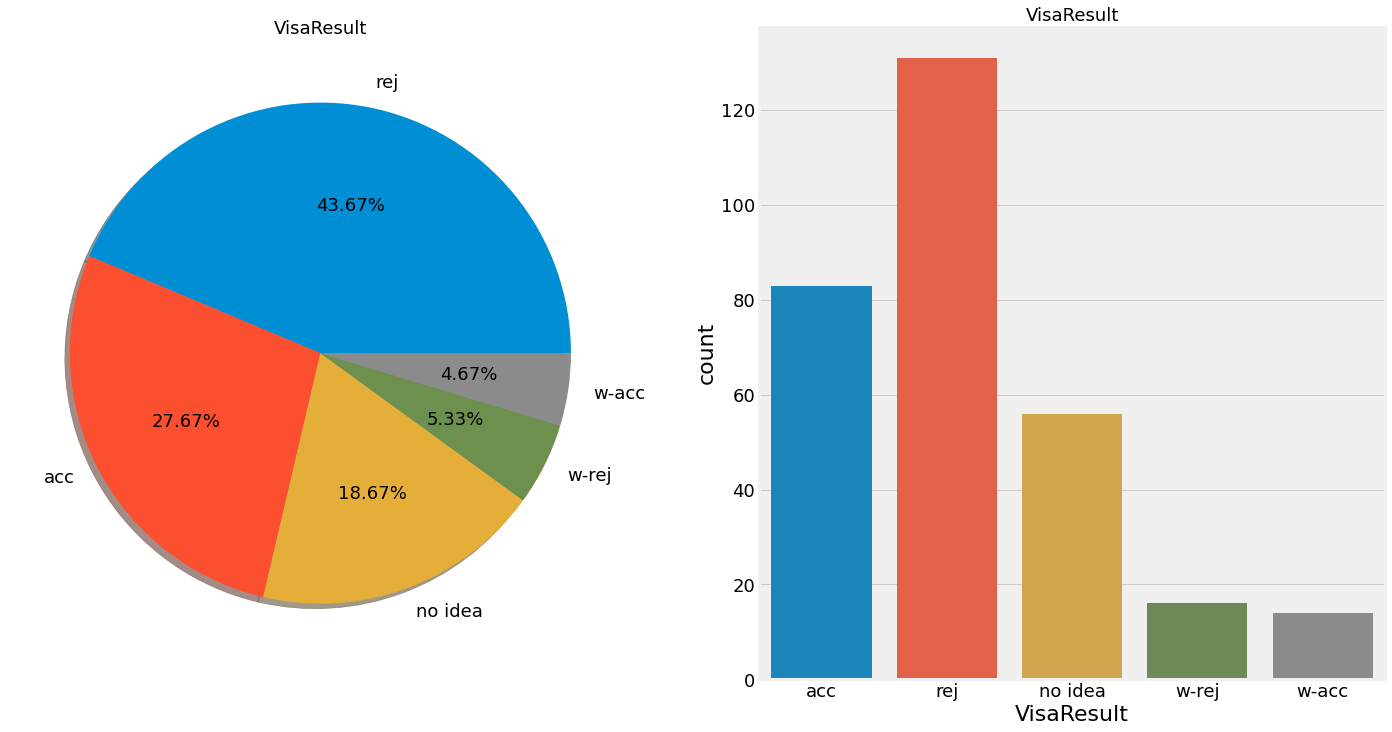

In [18]:
f, ax = plt.subplots(1, 2, figsize=(22, 12))
data['VisaResult'].value_counts().plot.pie(
    autopct='%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('VisaResult')
ax[0].set_ylabel('')
sns.countplot('VisaResult', data=data, ax=ax[1], hue_order=output_hue_order)
ax[1].set_title('VisaResult')
plt.show()

We don't have the labels for %18 of our data, but we have weak labels for around %10. In this way, we can revive 80% of labels by doing weak supervised learning. Check [Snorkel](https://www.snorkel.org/get-started/) for more information. 

### P1.AdultFlag -> categorical

In [19]:
data.groupby(['P1.AdultFlag','VisaResult'])['VisaResult'].count()

P1.AdultFlag  VisaResult
False         acc             1
              rej             1
True          acc            82
              no idea        56
              rej           130
              w-acc          14
              w-rej          16
Name: VisaResult, dtype: int64

In [20]:
data[data['P1.AdultFlag'] == False]

,P1.AdultFlag,P1.PD.ServiceIn.ServiceIn,P1.PD.VisaType.VisaType,P1.PD.AliasName.AliasNameIndicator.AliasNameIndicator,P1.PD.Sex.Sex,P1.PD.PlaceBirthCity,P1.PD.PlaceBirthCountry,P1.PD.Citizenship.Citizenship,P1.PD.CurrCOR.Row2.Country,P1.PD.CurrCOR.Row2.Status,P1.PD.CurrCOR.Row2.Other,P1.PD.PCRIndicator,P1.PD.PrevCOR.Row2.Country,P1.PD.PrevCOR.Row2.Status,P1.PD.PrevCOR.Row3.Country,P1.PD.PrevCOR.Row3.Status,P1.PD.SameAsCORIndicator,P1.PD.CWA.Row2.Country,P1.PD.CWA.Row2.Status,P1.PD.CWA.Row2.Other,P1.MS.SecA.MS,P2.MS.SecA.PrevMarrIndicator,P2.MS.SecA.TypeOfRelationship,P2.MS.SecA.Psprt.CountryofIssue.CountryofIssue,P2.MS.SecA.Langs.languages.nativeLang.nativeLang,P2.MS.SecA.Langs.languages.ableToCommunicate.ableToCommunicate,P2.MS.SecA.Langs.LangTest,P2.natID.q1.natIDIndicator,P2.natID.natIDdocs.CountryofIssue.CountryofIssue,P2.USCard.q1.usCardIndicator,P2.CI.cntct.PhnNums.Phn.CanadaUS,P2.CI.cntct.PhnNums.AltPhn.CanadaUS,P3.DOV.PrpsRow1.PrpsOfVisit.PrpsOfVisit,P3.DOV.PrpsRow1.Other.Other,P3.DOV.PrpsRow1.Funds.Funds,P3.DOV.cntcts_Row1.RelationshipToMe.RelationshipToMe,P3.cntcts_Row2.Relationship.RelationshipToMe,P3.Edu.EduIndicator,P3.Edu.Edu_Row1.Country.Country,P3.Occ.OccRow1.Occ.Occ,P3.Occ.OccRow1.Country.Country,P3.Occ.OccRow2.Occ.Occ,P3.Occ.OccRow2.Country.Country,P3.Occ.OccRow3.Occ.Occ,P3.Occ.OccRow3.Country.Country,P3.BGI.Details.MedicalDetails,P3.BGI.otherThanMedic,P3.noAuthStay,P3.refuseDeport,P3.BGI2.PrevApply,P3.PWrapper.criminalRec,P3.PWrapper.Military.Choice,P3.PWrapper.politicViol,P3.PWrapper.witnessIllTreat,P1.PD.CurrCOR.Row2.Period,P1.PD.DOBYear.Period,P1.PD.PrevCOR.Row2.Period,P1.PD.PrevCOR.Row3.Period,P1.PD.CWA.Row2.Period,P1.MS.SecA.DateOfMarr.Period,P2.MS.SecA.PrevSpouseDOB.DOBYear.Period,P2.MS.SecA.Period,P2.MS.SecA.Psprt.ExpiryDate.Remaining,P3.DOV.PrpsRow1.HLS.Period,P3.Edu.Edu_Row1.Period,P3.Occ.OccRow1.Period,P3.Occ.OccRow2.Period,P3.Occ.OccRow3.Period,p1.Subform1.Visitor,p1.Subform1.Worker,p1.Subform1.Student,p1.Subform1.Other,p1.SecA.App.ChdMStatus,p1.SecA.Sps.SpsCOB,p1.SecA.Sps.SpsOcc,p1.SecA.Sps.SpsAccomp,p1.SecA.Mo.MoCOB,p1.SecA.Mo.MoOcc,p1.SecA.Mo.MoAccomp,p1.SecA.Mo.ChdMStatus,p1.SecA.Fa.FaCOB,p1.SecA.Fa.FaOcc,p1.SecA.Fa.FaAccomp,p1.SecA.Fa.ChdMStatus,p1.SecB.Chd.[0].ChdMStatus,p1.SecB.Chd.[0].ChdRel,p1.SecB.Chd.[0].ChdCOB,p1.SecB.Chd.[0].ChdOcc,p1.SecB.Chd.[0].ChdAccomp,p1.SecB.Chd.[1].ChdMStatus,p1.SecB.Chd.[1].ChdRel,p1.SecB.Chd.[1].ChdCOB,p1.SecB.Chd.[1].ChdOcc,p1.SecB.Chd.[1].ChdAccomp,p1.SecB.Chd.[2].ChdMStatus,p1.SecB.Chd.[2].ChdRel,p1.SecB.Chd.[2].ChdCOB,p1.SecB.Chd.[2].ChdOcc,p1.SecB.Chd.[2].ChdAccomp,p1.SecB.Chd.[3].ChdMStatus,p1.SecB.Chd.[3].ChdRel,p1.SecB.Chd.[3].ChdCOB,p1.SecB.Chd.[3].ChdOcc,p1.SecB.Chd.[3].ChdAccomp,p1.SecC.Chd.[0].ChdMStatus,p1.SecC.Chd.[0].ChdRel,p1.SecC.Chd.[0].ChdCOB,p1.SecC.Chd.[0].ChdOcc,p1.SecC.Chd.[0].ChdAccomp,p1.SecC.Chd.[1].ChdMStatus,p1.SecC.Chd.[1].ChdRel,p1.SecC.Chd.[1].ChdCOB,p1.SecC.Chd.[1].ChdOcc,p1.SecC.Chd.[1].ChdAccomp,p1.SecC.Chd.[2].ChdMStatus,p1.SecC.Chd.[2].ChdRel,p1.SecC.Chd.[2].ChdCOB,p1.SecC.Chd.[2].ChdOcc,p1.SecC.Chd.[2].ChdAccomp,p1.SecC.Chd.[3].ChdMStatus,p1.SecC.Chd.[3].ChdRel,p1.SecC.Chd.[3].ChdCOB,p1.SecC.Chd.[3].ChdOcc,p1.SecC.Chd.[3].ChdAccomp,p1.SecC.Chd.[4].ChdMStatus,p1.SecC.Chd.[4].ChdRel,p1.SecC.Chd.[4].ChdCOB,p1.SecC.Chd.[4].ChdOcc,p1.SecC.Chd.[4].ChdAccomp,p1.SecC.Chd.[5].ChdMStatus,p1.SecC.Chd.[5].ChdRel,p1.SecC.Chd.[5].ChdCOB,p1.SecC.Chd.[5].ChdOcc,p1.SecC.Chd.[5].ChdAccomp,p1.SecC.Chd.[6].ChdMStatus,p1.SecC.Chd.[6].ChdRel,p1.SecC.Chd.[6].ChdCOB,p1.SecC.Chd.[6].ChdOcc,p1.SecC.Chd.[6].ChdAccomp,p1.SecA.Sps.SpsDOB.Period,p1.SecA.Mo.MoDOB.Period,p1.SecA.Fa.FaDOB.Period,p1.SecB.Chd.[0].ChdDOB.Period,p1.SecB.Chd.[1].ChdDOB.Period,p1.SecB.Chd.[2].ChdDOB.Period,p1.SecB.Chd.[3].ChdDOB.Period,p1.SecC.Chd.[0].ChdDOB.Period,p1.SecC.Chd.[1].ChdDOB.Period,p1.SecC.Chd.[2].ChdDOB.Period,p1.SecC.Chd.[3].ChdDOB.Period,p1.SecC.Chd.[4].ChdDOB.Period,p1.SecC.Chd.[5].ChdDOB.Period,p1.SecC.Chd.[6].ChdDOB.Period,VisaResult
15,False,1.0,VisitorVisa

Ok, useless kids, dropping all of them, and hence, the entire `P1.AdultFlag` flag

In [21]:
data.drop('P1.AdultFlag', axis=1, inplace=True)

### P1.PD.ServiceIn.ServiceIn -> categorical

In [22]:
data.groupby(['P1.PD.ServiceIn.ServiceIn','VisaResult'])['VisaResult'].count()

P1.PD.ServiceIn.ServiceIn  VisaResult
1.0                        acc            83
                           no idea        56
                           rej           131
                           w-acc          14
                           w-rej          16
Name: VisaResult, dtype: int64

In [23]:
# drop useless
data.drop('P1.PD.ServiceIn.ServiceIn', axis=1, inplace=True)

### P1.PD.ServiceIn.ServiceIn -> categorical

In [24]:
data.groupby(['P1.PD.VisaType.VisaType','VisaResult'])['VisaResult'].count()

P1.PD.VisaType.VisaType  VisaResult
VisitorVisa              acc            83
                         no idea        56
                         rej           131
                         w-acc          14
                         w-rej          16
Name: VisaResult, dtype: int64

In [25]:
# drop useless
data.drop('P1.PD.VisaType.VisaType', axis=1, inplace=True)

### P1.PD.AliasName.AliasNameIndicator.AliasNameIndicator -> categorical

In [26]:
output_name = 'VisaResult'
feature_name = 'P1.PD.AliasName.AliasNameIndicator.AliasNameIndicator'
data.groupby([feature_name, output_name])[output_name].count()

P1.PD.AliasName.AliasNameIndicator.AliasNameIndicator  VisaResult
False                                                  acc            76
                                                       no idea        54
                                                       rej           118
                                                       w-acc          12
                                                       w-rej          16
True                                                   acc             7
                                                       no idea         2
                                                       rej            13
                                                       w-acc           2
Name: VisaResult, dtype: int64

/home/nik/anaconda3/envs/py39l/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


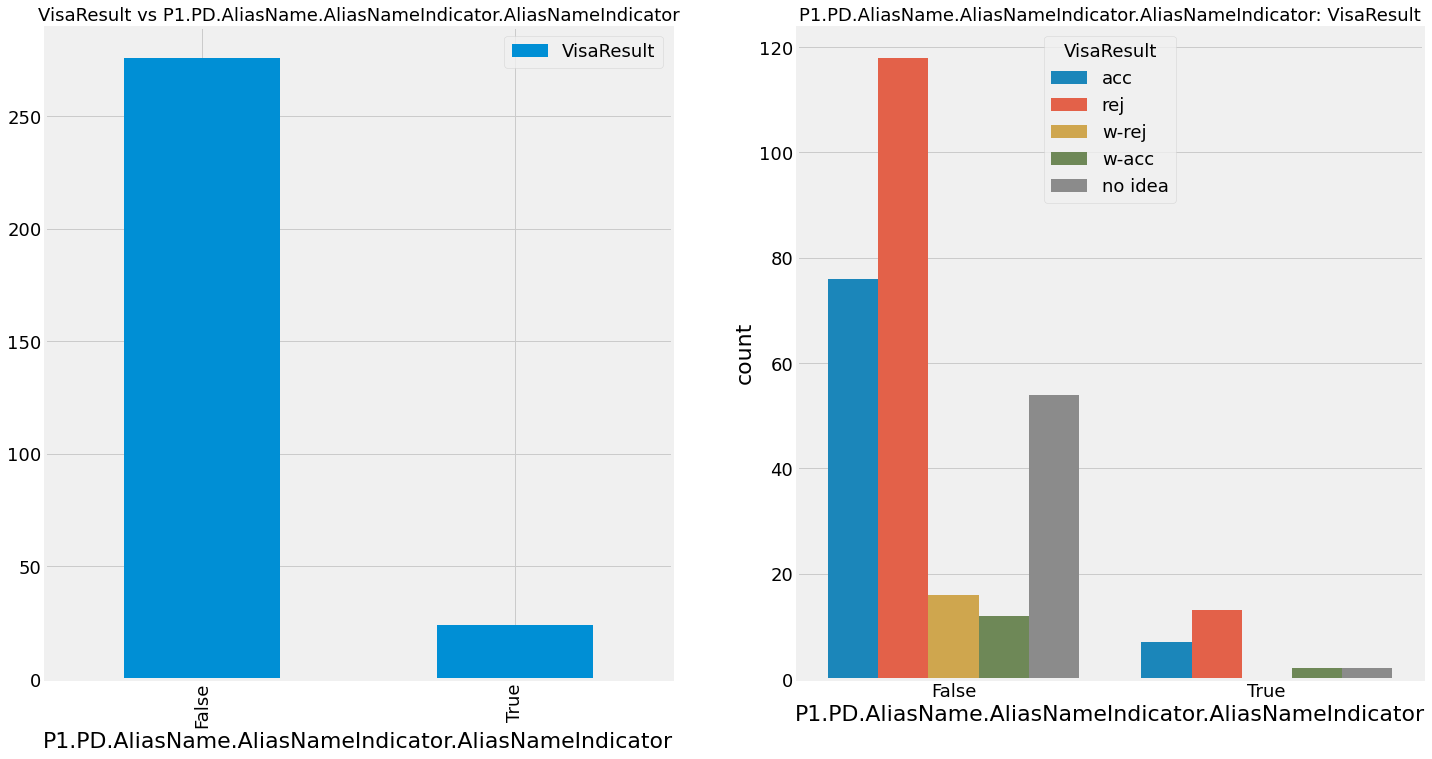

In [27]:
f, ax = plt.subplots(1, 2, figsize=(22, 12))
data[[feature_name, output_name]].groupby(
    [feature_name]).count().plot.bar(ax=ax[0])
ax[0].set_title('{} vs {}'.format(output_name, feature_name))
sns.countplot(feature_name, hue=output_name, data=data, ax=ax[1], hue_order=output_hue_order)
ax[1].set_title('{}: {}'.format(feature_name, output_name))
plt.show()

TODO: They seem proportional, for now, we skip it, but if after modeling, we didn't find any improvement by including this feature, we must remove it.

### P1.PD.Sex.Sex -> categorical

In [28]:
output_name = 'VisaResult'
feature_name = 'P1.PD.Sex.Sex'
data.groupby([feature_name, output_name])[output_name].count()

P1.PD.Sex.Sex  VisaResult
Female         acc           47
               no idea       28
               rej           60
               w-acc          6
               w-rej          9
Male           acc           36
               no idea       28
               rej           71
               w-acc          8
               w-rej          7
Name: VisaResult, dtype: int64

/home/nik/anaconda3/envs/py39l/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


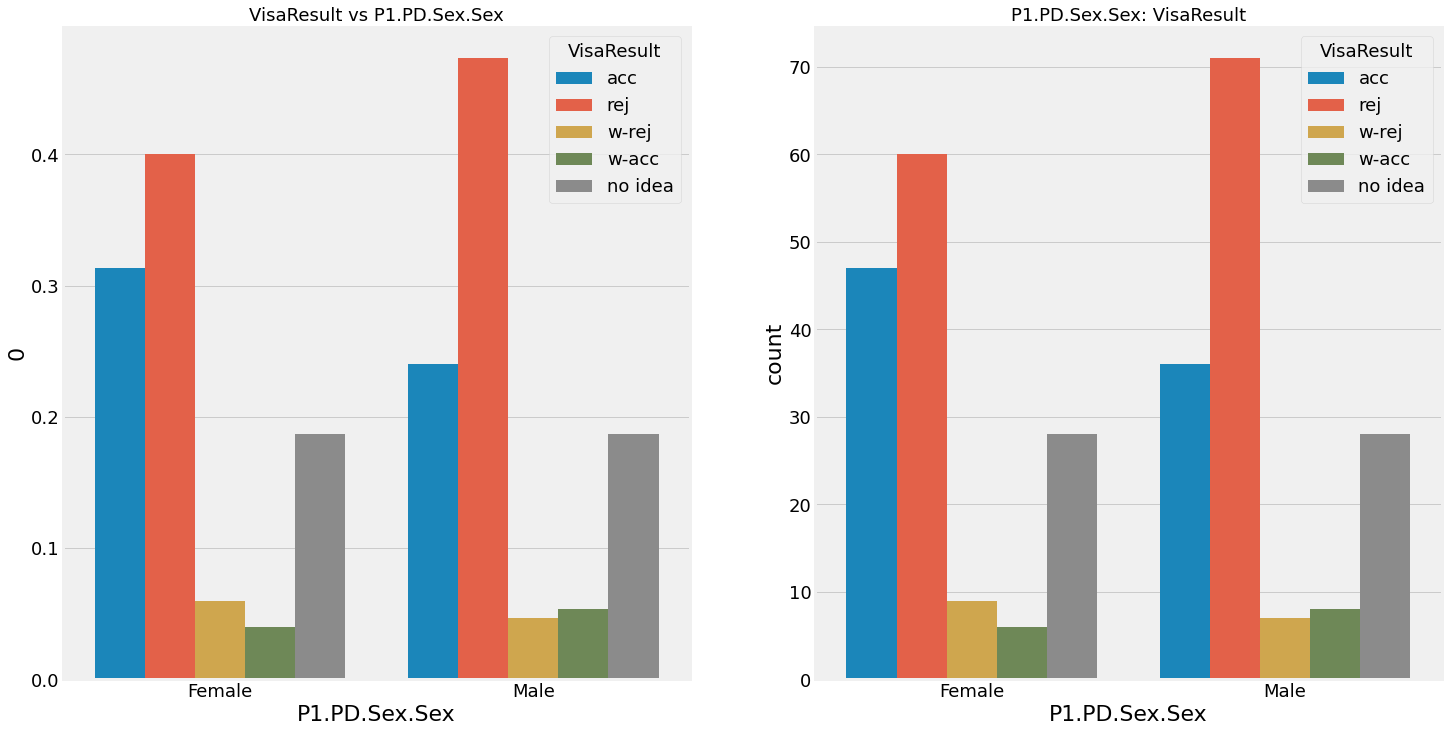

In [29]:
f, ax = plt.subplots(1, 2, figsize=(22, 12))
z = data[[feature_name, output_name]].groupby(
    [feature_name]).value_counts(normalize=True).reset_index()
sns.barplot(x=feature_name, y=0, hue=output_name, data=z, ax=ax[0], hue_order=output_hue_order)
ax[0].set_title('{} vs {}'.format(output_name, feature_name))
sns.countplot(feature_name, hue=output_name, data=data, ax=ax[1], hue_order=output_hue_order)
ax[1].set_title('{}: {}'.format(feature_name, output_name))
plt.show()

**It seems that women are getting more visas than man, even though the number of applicants in term of gender are almost equal.**

### P1.PD.PlaceBirthCity -> categorical

In [30]:
output_name = 'VisaResult'
feature_name = 'P1.PD.PlaceBirthCity'
data.groupby([feature_name, output_name])[output_name].count()

P1.PD.PlaceBirthCity  VisaResult
ABADAN                acc           2
                      no idea       1
AHVAZ                 acc           1
                      rej           2
                      w-acc         2
                                   ..
Tehran                rej           4
VARAMIN               no idea       1
ZANJAN                acc           2
                      no idea       2
esfahan               no idea       1
Name: VisaResult, Length: 118, dtype: int64

In [31]:
pd.crosstab(data[feature_name], data[output_name],
            margins=True).style.background_gradient(cmap='summer_r')

VisaResult,acc,no idea,rej,w-acc,w-rej,All
P1.PD.PlaceBirthCity,,,,,,
ABADAN,2,1,0,0,0,3
AHVAZ,1,0,2,2,0,5
AMOL,0,1,0,0,0,1
ANDIMESHK,1,0,1,0,0,2
ARAK,0,0,2,0,0,2
ARDEBIL,4,0,2,0,0,6
Abadan,0,0,1,0,0,1
BABOL,1,1,1,2,0,5
BAFGH,0,0,1,0,0,1


The data fro other cities except Tehran, Karaj and Shiraz is too small to matter. At the end of the day, the value of land is summarized into assets, so no point in this, hence deleted.

In [32]:
# drop useless
data.drop('P1.PD.PlaceBirthCity', axis=1, inplace=True)

### P1.PD.PlaceBirthCountry -> categorical

In [33]:
output_name = 'VisaResult'
feature_name = 'P1.PD.PlaceBirthCountry'
data.groupby([feature_name, output_name])[output_name].count()

P1.PD.PlaceBirthCountry  VisaResult
059                      rej             1
226                      no idea         1
IRAN                     acc            83
                         no idea        55
                         rej           130
                         w-acc          14
                         w-rej          16
Name: VisaResult, dtype: int64

Well, all are from damned Iran, so let's drop it.

In [34]:
# drop useless
data.drop('P1.PD.PlaceBirthCountry', axis=1, inplace=True)

### P1.PD.Citizenship.Citizenship -> categorical

In [35]:
output_name = 'VisaResult'
feature_name = 'P1.PD.Citizenship.Citizenship'
data.groupby([feature_name, output_name])[output_name].count()

P1.PD.Citizenship.Citizenship  VisaResult
IRAN                           acc            83
                               no idea        56
                               rej           129
                               w-acc          14
                               w-rej          16
TURKEY                         rej             2
Name: VisaResult, dtype: int64

In [36]:
# drop useless
data.drop('P1.PD.Citizenship.Citizenship', axis=1, inplace=True)

### P1.PD.CurrCOR.Row2.Country -> categorical

In [37]:
output_name = 'VisaResult'
feature_name = 'P1.PD.CurrCOR.Row2.Country'
data.groupby([feature_name, output_name])[output_name].count()

P1.PD.CurrCOR.Row2.Country  VisaResult
280                         acc             1
511                         acc             1
IRAN                        acc            81
                            no idea        56
                            rej           131
                            w-acc          14
                            w-rej          16
Name: VisaResult, dtype: int64

It is hard to say that how having different country of residence than IRAN effects the output variable. So know more about it, especially if it is **anomaly** or not, we currently skip it and after having a clean data, we use visualization, statistical or ML methods to figure this out. [See this for more information](https://www.analyticsvidhya.com/blog/2021/04/dealing-with-anomalies-in-the-data/)

We can also make this into categorical, [`IRAN`, `OTHER`] and simplify things, but if it's anomaly, I prefer fixing it.

TODO: last priority but mandatory

### P1.PD.CurrCOR.Row2.Status -> categorical

In [38]:
data[data['P1.PD.CurrCOR.Row2.Country'] != 'IRAN']['P1.PD.CurrCOR.Row2.Status']

140    2.0
267    4.0
Name: P1.PD.CurrCOR.Row2.Status, dtype: float64

Similar as [P1.PD.CurrCOR.Row2.Country](#P1.PD.CurrCOR.Row2.Country)

### P1.PD.CurrCOR.Row2.Other -> categorical

In [39]:
output_name = 'VisaResult'
feature_name = 'P1.PD.CurrCOR.Row2.Other'
data.groupby([feature_name, output_name])[output_name].count()

P1.PD.CurrCOR.Row2.Other  VisaResult
False                     acc            83
                          no idea        56
                          rej           131
                          w-acc          14
                          w-rej          16
Name: VisaResult, dtype: int64

In [40]:
# drop useless
data.drop('P1.PD.CurrCOR.Row2.Other', axis=1, inplace=True)

### P1.PD.PCRIndicator -> categorical

In [41]:
output_name = 'VisaResult'
feature_name = 'P1.PD.PCRIndicator'
data.groupby([feature_name, output_name])[output_name].count()

P1.PD.PCRIndicator  VisaResult
False               acc            77
                    no idea        56
                    rej           128
                    w-acc          14
                    w-rej          12
True                acc             6
                    rej             3
                    w-rej           4
Name: VisaResult, dtype: int64

/home/nik/anaconda3/envs/py39l/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


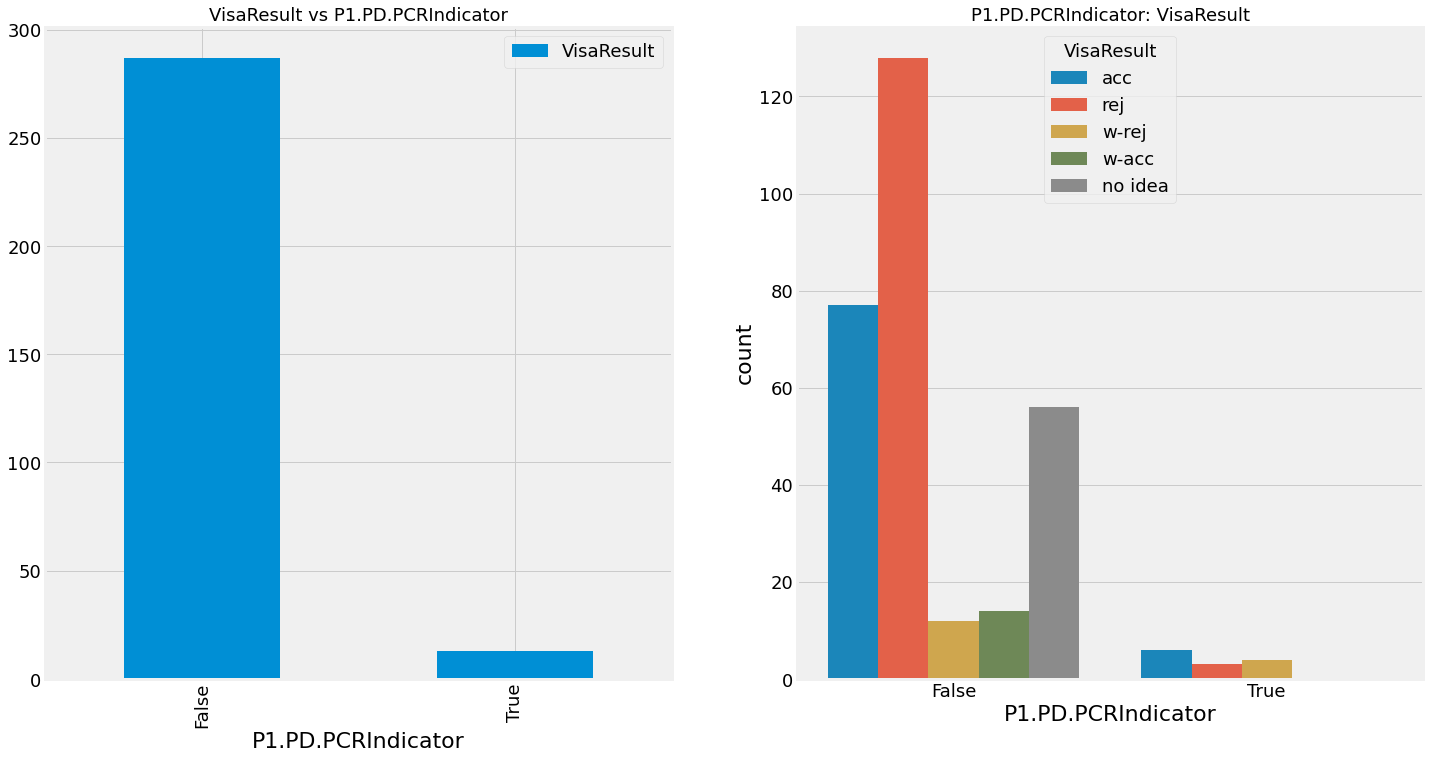

In [42]:
f, ax = plt.subplots(1, 2, figsize=(22, 12))
data[[feature_name, output_name]].groupby(
    [feature_name]).count().plot.bar(ax=ax[0])
ax[0].set_title('{} vs {}'.format(output_name, feature_name))
sns.countplot(feature_name, hue=output_name, data=data, ax=ax[1], hue_order=output_hue_order)
ax[1].set_title('{}: {}'.format(feature_name, output_name))
plt.show()

It is hard to say, but having previous country of residence has higher acceptance rate than none ones. Well, this is maybe the case, because they showed that they have resided in third-party countries and went back to their home country.

### P1.PD.PrevCOR.Row[i].\* -> categorical

In [43]:
output_name = 'VisaResult'
feature_name = 'P1.PD.PrevCOR.Row2.Country'
data.groupby([feature_name, output_name])[output_name].count()

P1.PD.PrevCOR.Row2.Country  VisaResult
016                         w-rej           2
028                         acc             1
                            rej             2
034                         acc             1
052                         acc             2
202                         w-rej           1
224                         w-rej           1
226                         rej             1
280                         acc             1
OTHER                       acc            77
                            no idea        56
                            rej           128
                            w-acc          14
                            w-rej          12
TURKEY                      acc             1
Name: VisaResult, dtype: int64

Ok, we have good amount of examples that cannot be ignored or labeled as anomaly.

The main issue here is that the countries are so diverse that cannot be considered. To fix this, we consider label feature `P1.PD.PCRIndicator` which is a binary variable indicating if the candidate has had previous country of residence or not. The below cell confirms this, so we drop this column and second row of the same info, i.e. `P1.PD.PrevCOR.Row2.Country`, `P1.PD.PrevCOR.Row2.Status`, `P1.PD.PrevCOR.Row3.Country`, `P1.PD.PrevCOR.Row3.Status`.

All these columns can be integrated into another column, aggregating all of these into sum of non-`OTHER` status for PrevCOR, simply put, the count of previous countries of residence. In this case, `0` means no PCR, so we can get rid of `P1.PD.PCRIndicator` too.

In [44]:
data[data['P1.PD.PCRIndicator'] == True].groupby([feature_name, output_name])[output_name].count()

P1.PD.PrevCOR.Row2.Country  VisaResult
016                         w-rej         2
028                         acc           1
                            rej           2
034                         acc           1
052                         acc           2
202                         w-rej         1
224                         w-rej         1
226                         rej           1
280                         acc           1
TURKEY                      acc           1
Name: VisaResult, dtype: int64

In [45]:
output_name = 'VisaResult'
feature_names = ['P1.PD.PrevCOR.Row2.Country', ]
data.groupby([feature_name, output_name])[output_name].count()

P1.PD.PrevCOR.Row2.Country  VisaResult
016                         w-rej           2
028                         acc             1
                            rej             2
034                         acc             1
052                         acc             2
202                         w-rej           1
224                         w-rej           1
226                         rej             1
280                         acc             1
OTHER                       acc            77
                            no idea        56
                            rej           128
                            w-acc          14
                            w-rej          12
TURKEY                      acc             1
Name: VisaResult, dtype: int64

In [46]:
output_name = 'VisaResult'
data.groupby(['P1.PD.PrevCOR.Row2.Status', 'P1.PD.PrevCOR.Row3.Status']).size()

P1.PD.PrevCOR.Row2.Status  P1.PD.PrevCOR.Row3.Status
2.0                        6.0                            1
3.0                        3.0                            1
                           6.0                            1
4.0                        6.0                            3
5.0                        6.0                            3
6.0                        6.0                          291
dtype: int64

In [47]:
from functools import reduce
import re
r = re.compile('P1.PD.PrevCOR.Row..Status')
mask = np.isin(data.columns.values, list(filter(r.match, data.columns.values)))
feature_names = list(data.columns.values[mask])


def previous_residency_country_count(series: pd.Series):
    # 6 means no previous country of residency
    return reduce(lambda x, y: 2 - np.sum(np.isin([x, y], [6])), series)


# replace rows of previous country of residency to count of them
data['P1.PD.PrevCOR.Row.Count'] = data[feature_names].agg([previous_residency_country_count], axis=1)
data = data.rename(
    columns={previous_residency_country_count.__name__: 'P1.PD.PrevCOR.Row.Count'})

# delete redundant columns tnx to newly created 'P1.PD.PrevCOR.Row.Count'
data.drop(['P1.PD.PrevCOR.Row2.Country', 'P1.PD.PrevCOR.Row2.Status', 'P1.PD.PrevCOR.Row3.Country',
          'P1.PD.PrevCOR.Row3.Status', 'P1.PD.PCRIndicator'], axis=1, inplace=True)

In [49]:
data.describe()

,P1.PD.CurrCOR.Row2.Status,P1.PD.CWA.Row2.Status,P3.DOV.PrpsRow1.PrpsOfVisit.PrpsOfVisit,P3.DOV.PrpsRow1.Funds.Funds,P1.PD.CurrCOR.Row2.Period,P1.PD.DOBYear.Period,P1.PD.PrevCOR.Row2.Period,P1.PD.PrevCOR.Row3.Period,P1.PD.CWA.Row2.Period,P1.MS.SecA.DateOfMarr.Period,P2.MS.SecA.PrevSpouseDOB.DOBYear.Period,P2.MS.SecA.Period,P2.MS.SecA.Psprt.ExpiryDate.Remaining,P3.DOV.PrpsRow1.HLS.Period,P3.Edu.Edu_Row1.Period,P3.Occ.OccRow1.Period,P3.Occ.OccRow2.Period,P3.Occ.OccRow3.Period,p1.Subform1.Visitor,p1.Subform1.Worker,p1.Subform1.Student,p1.Subform1.Other,p1.SecA.App.ChdMStatus,p1.SecA.Mo.ChdMStatus,p1.SecA.Fa.ChdMStatus,p1.SecB.Chd.[0].ChdMStatus,p1.SecB.Chd.[1].ChdMStatus,p1.SecB.Chd.[2].ChdMStatus,p1.SecB.Chd.[3].ChdMStatus,p1.SecC.Chd.[0].ChdMStatus,p1.SecC.Chd.[1].ChdMStatus,p1.SecC.Chd.[2].ChdMStatus,p1.SecC.Chd.[3].ChdMStatus,p1.SecC.Chd.[4].ChdMStatus,p1.SecC.Chd.[5].ChdMStatus,p1.SecC.Chd.[6].ChdMStatus,p1.SecA.Sps.SpsDOB.Period,p1.SecA.Mo.MoDOB.Period,p1.SecA.Fa.FaDOB.Period,p1.SecB.Chd.[0].ChdDOB.Period,p1.SecB.Chd.[1].ChdDOB.Period,p1.SecB.Chd.[2].ChdDOB.Period,p1.SecB.Chd.[3].ChdDOB.Period,p1.SecC.Chd.[0].ChdDOB.Period,p1.SecC.Chd.[1].ChdDOB.Period,p1.SecC.Chd.[2].ChdDOB.Period,p1.SecC.Chd.[3].ChdDOB.Period,p1.SecC.Chd.[4].ChdDOB.Period,p1.SecC.Chd.[5].ChdDOB.Period,p1.SecC.Chd.[6].ChdDOB.Period,P1.PD.PrevCOR.Row.Count
count,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.0,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,189.000000,189.000000,189.000000,189.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,300.000000
mean,1.020000,4.290000,5.523333,9055.000000,15756.33000,15821.043333,27.950000,1.206667,42.333333,5239.393333,1795.383333,587.110000,1448.89000,24.923333,949.130000,4665.136667,1153.353333,286.503333,0.950000,0.003333,0.0,0.0,5.423333,6.223333,6.626667,6.950000,7.756667,8.616667,8.833333,5.586667,6.230000,6.823333,7.530000,8.036667,8.423333,8.666667,12748.456667,22823.800000,23774.910000,7378.954145,6310.359788,6363.330688,6448.304233,17177.692539,16129.086643,15500.882671,15414.244886,15448.820096,15511.760529,15580.858604,0.033333
std,0.215456,1.572942,4.231921,2047.383925,5075.87792,4945.098745,179.839079,20.900080,26.870099,5137.721138,6108.954893,2627.407896,461.75294,60.054358,905.918152,4280.130933,2395.230148,939.654076,0.218309,0.057735,0.0,0.0,1.077649,1.688082,2.038252,1.662341,1.614355,1.104743,0.762119,1.254752,1.734106,1.979525,1.863871,1.680696,1.410942,1.101332,8272.765283,8632.479316,10396.825357,5440.907751,5379.481525,4864.816808,4868.576394,5511.114986,5630.606445,5165.227044,5054.554689,5192.877979,5183.541196,4991.725592,0.197532
min,1.000000,1.000000,1.000000,1000.000000,31.00000,248.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-365.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.000000,1.000000,1.000000,3.000000,5.000000,5.000000,5.000000,1.000000,3.000000,3.000000,5.000000,5.000000,3.000000,3.000000,0.000000,0.000000,0.000000,203.000000,203.000000,203.000000,203.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,0.000000
25%,1.000000,3.000000,2.000000,8000.000000,12564.25000,12590.250000,0.000000,0.000000,30.000000,338.250000,0.000000,0.000000,1182.75000,13.000000,0.000000,1457.250000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,5.000000,5.000000,5.000000,6.000000,6.000000,9.000000,9.000000,5.000000,5.000000,5.000000,5.000000,8.250000,9.000000,9.000000,9989.750000,20811.000000,22123.750000,2658.000000,1646.000000,2287.500000,2294.000000,13508.000000,11818.000000,11826.000000,12012.000000,12143.500000,12215.500000,12332.333333,0.000000
50%,1.000000,3.000000,2.